# An Analysis of Spotify's _Top Tracks of 2022 - Nigeria_  Playlist
## By Neto Anyama.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
### Introduction
Hi! I'm Neto Anyama. In this project, I performed exploratory data analysis on the Top Tracks of 2022 Nigeria playlist, curated by Spotify, on Spotify. It contained the 50 songs that were most listened to in Nigeria, where I'm from.

#### Dataset Features.
1. Name: The name of the track.                  
2. Album: The album on which the track appears.           
3. Artist: The name of the performing artist.               
4. Release Date: The date the song/album was released.    
5. Duration: The duration of the track in minutes, originally in milliseconds.            
6. Popularity: The score assigned to each track based on the number of streams, likes etc.            
7. Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
8. Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.          
9. Key: The key the track is in. If no key was detected, the value is -1. Key ranges from -1 to 11.
10. Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
11. Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
12. Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 
13. Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
14. Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
15. Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.            
16. Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
17. Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.                
18. ID: The Spotify ID for the track.
19. Time Signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

> Descriptions of most of the columns were obtained from [here](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features).
  
#### Questions.
1. What are the most popular songs overall?
2. In what month were most of these songs released?
3. How did certain audio features influence popularity?

Listen to the playlist [here](https://open.spotify.com/playlist/37i9dQZF1DX1W96TRrqJX4). Here we go!

<a id='wrangling'></a>
### Data Wrangling
#### Gathering

To begin, I installed and imported all necessary libraries. The most important `Spotipy` and `SpotifyClientCredentials`. I'd already received my required keys, so I fed that into the code block too. 

While trying to scrape the data, I kept running into connection time out issues. So I included a solution obtained from [here](https://stackoverflow.com/questions/57994570/readtimeout-httpsconnectionpoolhost-port-443-read-timed-out-read-timeo) to rectify that.

Finally, I used two libraries that were new to me, `Image from PIL` and `rembg` to remove the background of one of the pictures I used in my PowerBI visualization.

In [1]:
#importing libraries
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '49384e88100947de8cf6e3dd8e92a7bb'
client_secret = '5adb1452f8de4f0f90f7e6d9cbbd3c84'

client_credentials_manager = SpotifyClientCredentials(client_id= client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

import pandas as pd

import time

import  json

import urllib3, socket
from urllib3.connection import HTTPConnection
    
HTTPConnection.default_socket_options = (HTTPConnection.default_socket_options + [
    (socket.SOL_SOCKET, socket.SO_SNDBUF, 1000000), #1MB in byte
            (socket.SOL_SOCKET, socket.SO_RCVBUF, 1000000)
        ])

from PIL import Image
import rembg

In [3]:
#ignoring llvmlite to installing rembg
pip install --ignore-installed llvmlite

  Using cached llvmlite-0.39.1-cp39-cp39-win_amd64.whl (23.2 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.54.1 requires llvmlite<0.38,>=0.37.0rc1, but you have llvmlite 0.39.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.5 which is incompatible.


In [4]:
pip install rembg

  Using cached rembg-2.0.29-py3-none-any.whl (13 kB)
  Using cached aiohttp-3.8.1-cp39-cp39-win_amd64.whl (554 kB)
  Using cached onnxruntime-1.13.1-cp39-cp39-win_amd64.whl (5.9 MB)
  Using cached python_multipart-0.0.5-py3-none-any.whl
  Using cached asyncer-0.0.2-py3-none-any.whl (8.3 kB)
  Using cached uvicorn-0.20.0-py3-none-any.whl (56 kB)
  Using cached scipy-1.9.3-cp39-cp39-win_amd64.whl (40.2 MB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached scikit_image-0.19.3-cp39-cp39-win_amd64.whl (12.1 MB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl (19 kB)
  Using cached opencv_python_headless-4.6.0.66-cp36-abi3-win_amd64.whl (35.5 MB)



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.


  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached PyMatting-1.1.8-py3-none-any.whl (47 kB)
  Using cached fastapi-0.87.0-py3-none-any.whl (55 kB)
  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)
  Using cached watchdog-2.1.9-py3-none-win_amd64.whl (78 kB)
  Using cached yarl-1.8.2-cp39-cp39-win_amd64.whl (56 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached frozenlist-1.3.3-cp39-cp39-win_amd64.whl (34 kB)
  Using cached anyio-3.6.2-py3-none-any.whl (80 kB)
  Using cached starlette-0.21.0-py3-none-any.whl (64 kB)
  Using cached pydantic-1.10.2-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached protobuf-4.21.12-cp39-cp39-win_amd64.whl (527 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
  Using cached flatbuffers-22.12.6-py2.py3-none-any.whl (26 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Using cached numba-0.56.4-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)
  Att

Afterwards, I wrote a function, using the playlist ID, to return the list of the Spotify IDs of all the tracks in the playlist. 

In [2]:
# function to scrape track ids
def getTrackID(playlist_id):
    track_ids=[]
    play_list = sp.playlist(playlist_id)
    for item in play_list['tracks']['items']:
        track=item['track']
        track_ids.append(track['id'])
    return track_ids

track_ids = getTrackID('37i9dQZF1DX1W96TRrqJX4')

In [3]:
track_ids

['5YbPxJwPfrj7uswNwoF1pJ',
 '6ewsOjbC1jWAZcjAhVxDs0',
 '2qWwuCVeMjF9mUT0S5Iqvl',
 '4Gasn91fsCefnN8zM5GjA8',
 '7d1aTQlsHMgWmkPywDi7h1',
 '5ycsqezujKrwviU3VFhci1',
 '4lVEVXrlQlXPdYWMGTwrFe',
 '2SaRkvUkzNzL39fBB2hLpt',
 '3BnDvpeuGOj21Ir2aVEtQo',
 '4eZZofkV1OQ9GDqAgHqNpA',
 '5hVjoL3sHepZROri63wBxP',
 '4k4pdUWX8632g7yByxC3rS',
 '2WigMwGJysIh9fRnSJvpjn',
 '0HaRLPnr887lcQM2YQzkff',
 '2AKS1HhpLu2rgkojECUm3V',
 '2jZ2MrAk8iNZk1dsI0Vr5z',
 '6PojTTCNlz3qo3qBKuUyaO',
 '2wgvxtggKVzPkl0smF2UzI',
 '4lDghGd035xrzGp6Yec2j1',
 '4MzOppXoeKvDsVaNMeOK3C',
 '2XuLnQELesgnkCGZbSJHO0',
 '5UwxpuGHkwiojKDaPC5ZNu',
 '4G11wDzAKuCFqApL4g3ixC',
 '6oOCGD2Sp9UTcDsuDz8Hdu',
 '1zwZ26A7OA5wTrA3FejCLL',
 '6othjWxN6khdhiLu9GdOtj',
 '6McBvfxgkVfREmQPwTKBUn',
 '1XUf5lpeTQbrohZWdx6Sbz',
 '6rDbIKxHWteL6TnhLtj634',
 '2IBrgYf3Hjw16c6oNwkZ9M',
 '0s5nhb6ts6uCKAVnGg46y6',
 '6lXOGwFzCglrPMtuysPIUo',
 '1xs8bOvm3IzEYmcLJVOc34',
 '1B5I5yqLpVI5EosZS6bJFs',
 '2LqvzGaZniHiZ9CXhzkclD',
 '3ketN3dth18vSJ1T3HIztN',
 '2Ydj7wgn4ZrFFQsfFBTTYJ',
 

Then using the track IDs, I wrote another function `getTrackInfo`, to get basic information about the tracks: name, album, artist, release date, duration (which I converted from milliseconds to minutes) and track popularity. I then fed these information into a data dictionary, followed by a dataframe. Finally, I saved this information into a csv file `track_list.csv`,  for easy access later.

In [4]:
# function to scrape track information
def getTrackInfo(track_id):
    meta = sp.track(track_id)
    track_details = {'name' : meta['name'], 'album':meta['album']['name'], 'artist':meta['album']['artists'][0]['name'],
                'release_date':meta['album']['release_date'], 'duration':round((meta['duration_ms']*0.001)/60.0, 2),
                    'popularity':meta['popularity']}
    return track_details

In [5]:
#create a data dictionary 
track_list =[]
for i in range(len(track_ids)):
    time.sleep(.5)
    track = getTrackInfo(track_ids[i])
    track_list.append(track)

#create dataframe
tracks_df = pd.DataFrame(track_list, columns = ['name', 'album', 'artist', 'release_date', 'duration', 'popularity'])
tracks_df

,name,album,artist,release_date,duration,popularity
0,Last Last,"Love, Damini",Burna Boy,2022-07-07,2.87,81
1,Peace Be Unto You (PBUY),Mr. Money With The Vibe,Asake,2022-09-07,2.55,65
2,Bandana,Playboy,Fireboy DML,2022-08-04,2.97,69
3,Finesse,Finesse,Pheelz,2022-03-03,2.59,74
4,Omo Ope (feat. Olamide),Omo Ope,Asake,2022-01-18,2.77,62
5,Terminator,Mr. Money With The Vibe,Asake,2022-09-07,2.60,68
6,Overloading (OVERDOSE),Overloading (OVERDOSE),Mavins,2022-05-13,3.42,70
7,PALAZZO,PALAZZO,SPINALL,2022-05-13,3.10,60
8,Calm Down,Rave & Roses,Rema,2022-03-24,3.66,79
9,Buga (Lo Lo Lo),Buga (Lo Lo Lo),Kizz Daniel,2022-05-03,3.05,73


In [6]:
tracks_df.to_csv('track_list.csv', index=False)

In [14]:
tracks_df = pd.read_csv('track_list.csv')

Now still using the track IDs, I created another data dictionary `track_features`, to collect audio features such as danceability, energy, key etc., for each track. I then read these information into a dataframe, `feat_df`. Finally, I saved this information into a csv file `track_features.csv`, also for easy access later.

In [20]:
# to obtain track features
track_features = []
for id in track_ids:
        features = sp.audio_features(id)
        track_features.append(features)
feat_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                                  'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                                  'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 
                                  'duration_ms', 'time_signature'])
for item in track_features:
      for feat in item:
        feat_df = feat_df.append(feat, ignore_index=True)
feat_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.795,0.565,3,-4.457,0,0.0948,0.131,0,0.0802,0.550,87.925,audio_features,5YbPxJwPfrj7uswNwoF1pJ,spotify:track:5YbPxJwPfrj7uswNwoF1pJ,https://api.spotify.com/v1/tracks/5YbPxJwPfrj7...,https://api.spotify.com/v1/audio-analysis/5YbP...,172342,4
1,0.808,0.769,7,-7.207,0,0.0833,0.101,0.000041,0.1190,0.685,116.001,audio_features,6ewsOjbC1jWAZcjAhVxDs0,spotify:track:6ewsOjbC1jWAZcjAhVxDs0,https://api.spotify.com/v1/tracks/6ewsOjbC1jWA...,https://api.spotify.com/v1/audio-analysis/6ews...,153103,4
2,0.818,0.605,1,-7.121,1,0.0380,0.293,0.0116,0.0696,0.366,104.931,audio_features,2qWwuCVeMjF9mUT0S5Iqvl,spotify:track:2qWwuCVeMjF9mUT0S5Iqvl,https://api.spotify.com/v1/tracks/2qWwuCVeMjF9...,https://api.spotify.com/v1/audio-analysis/2qWw...,178225,4
3,0.859,0.551,1,-7.916,0,0.1490,0.559,0,0.1940,0.777,102.049,audio_features,4Gasn91fsCefnN8zM5GjA8,spotify:track:4Gasn91fsCefnN8zM5GjA8,https://api.spotify.com/v1/tracks/4Gasn91fsCef...,https://api.spotify.com/v1/audio-analysis/4Gas...,155293,4
4,0.905,0.747,9,-6.622,1,0.0442,0.117,0.000364,0.0505,0.866,117.008,audio_features,7d1aTQlsHMgWmkPywDi7h1,spotify:track:7d1aTQlsHMgWmkPywDi7h1,https://api.spotify.com/v1/tracks/7d1aTQlsHMgW...,https://api.spotify.com/v1/audio-analysis/7d1a...,166154,4


In [21]:
feat_df.to_csv('track_features.csv', index=False)

In [28]:
feat_df = pd.read_csv('track_features.csv')

Now, to create a master dataframe, `full_tracklist` I merged `tracks_df` and `feat_df` and saved it in a csv file, track_list.csv, ready for assessing and cleaning.

In [20]:
tracks_df['one'] = 1

In [36]:
tracks_df

,name,album,artist,release_date,duration,popularity,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,one
0,Last Last,"Love, Damini",Burna Boy,2022-07-07,2.87,81,0.795,0.565,3,-4.457,...,0.550,87.925,audio_features,5YbPxJwPfrj7uswNwoF1pJ,spotify:track:5YbPxJwPfrj7uswNwoF1pJ,https://api.spotify.com/v1/tracks/5YbPxJwPfrj7...,https://api.spotify.com/v1/audio-analysis/5YbP...,172342,4,1
1,Peace Be Unto You (PBUY),Mr. Money With The Vibe,Asake,2022-09-07,2.55,65,0.808,0.769,7,-7.207,...,0.685,116.001,audio_features,6ewsOjbC1jWAZcjAhVxDs0,spotify:track:6ewsOjbC1jWAZcjAhVxDs0,https://api.spotify.com/v1/tracks/6ewsOjbC1jWA...,https://api.spotify.com/v1/audio-analysis/6ews...,153103,4,1
2,Bandana,Playboy,Fireboy DML,2022-08-04,2.97,69,0.818,0.605,1,-7.121,...,0.366,104.931,audio_features,2qWwuCVeMjF9mUT0S5Iqvl,spotify:track:2qWwuCVeMjF9mUT0S5Iqvl,https://api.spotify.com/v1/tracks/2qWwuCVeMjF9...,https://api.spotify.com/v1/audio-analysis/2qWw...,178225,4,1
3,Finesse,Finesse,Pheelz,2022-03-03,2.59,74,0.859,0.551,1,-7.916,...,0.777,102.049,audio_features,4Gasn91fsCefnN8zM5GjA8,spotify:track:4Gasn91fsCefnN8zM5GjA8,https://api.spotify.com/v1/tracks/4Gasn91fsCef...,https://api.spotify.com/v1/audio-analysis/4Gas...,155293,4,1
4,Omo Ope (feat. Olamide),Omo Ope,Asake,2022-01-18,2.77,62,0.905,0.747,9,-6.622,...,0.866,117.008,audio_features,7d1aTQlsHMgWmkPywDi7h1,spotify:track:7d1aTQlsHMgWmkPywDi7h1,https://api.spotify.com/v1/tracks/7d1aTQlsHMgW...,https://api.spotify.com/v1/audio-analysis/7d1a...,166154,4,1
5,Terminator,Mr. Money With The Vibe,Asake,2022-09-07,2.60,68,0.804,0.688,0,-6.794,...,0.852,117.032,audio_features,5ycsqezujKrwviU3VFhci1,spotify:track:5ycsqezujKrwviU3VFhci1,https://api.spotify.com/v1/tracks/5ycsqezujKrw...,https://api.spotify.com/v1/audio-analysis/5ycs...,139487,4,1
6,Overloading (OVERDOSE),Overloading (OVERDOSE),Mavins,2022-05-13,3.42,70,0.546,0.611,0,-9.459,...,0.749,104.059,audio_features,4lVEVXrlQlXPdYWMGTwrFe,spotify:track:4lVEVXrlQlXPdYWMGTwrFe,https://api.spotify.com/v1/tracks/4lVEVXrlQlXP...,https://api.spotify.com/v1/audio-analysis/4lVE...,205000,4,1
7,PALAZZO,PALAZZO,SPINALL,2022-05-13,3.10,60,0.819,0.659,5,-9.024,...,0.441,116.054,audio_features,2SaRkvUkzNzL39fBB2hLpt,spotify:track:2SaRkvUkzNzL39fBB2hLpt,https://api.spotify.com/v1/tracks/2SaRkvUkzNzL...,https://api.spotify.com/v1/audio-analysis/2SaR...,186002,4,1
8,Calm Down,Rave & Roses,Rema,2022-03-24,3.66,79,0.814,0.789,11,-6.290,...,0.842,107.003,audio_features,3BnDvpeuGOj21Ir2aVEtQo,spotify:track:3BnDvpeuGOj21Ir2aVEtQo,https://api.spotify.com/v1/tracks/3BnDvpeuGOj2...,https://api.spotify.com/v1/audio-analysis/3BnD...,219669,4,1
9,Buga (Lo Lo Lo),Buga (Lo Lo Lo),Kizz Daniel,2022-05-03,3.05,73,0.920,0.716,8,-7.104,...,0.961,115.991,audio_features,4eZZofkV1OQ9GDqAgHqNpA,spotify:track:4eZZofkV1OQ9GDqAgHqNpA,https://api.spotify.com/v1/tracks/4eZZofkV1OQ9...,https://api.spotify.com/v1/audio-analysis/4eZZ...,183103,4,1


In [29]:
feat_df['one'] = 1
feat_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,one
0,0.795,0.565,3,-4.457,0,0.0948,0.13100,0.000000,0.0802,0.550,87.925,audio_features,5YbPxJwPfrj7uswNwoF1pJ,spotify:track:5YbPxJwPfrj7uswNwoF1pJ,https://api.spotify.com/v1/tracks/5YbPxJwPfrj7...,https://api.spotify.com/v1/audio-analysis/5YbP...,172342,4,1
1,0.808,0.769,7,-7.207,0,0.0833,0.10100,0.000041,0.1190,0.685,116.001,audio_features,6ewsOjbC1jWAZcjAhVxDs0,spotify:track:6ewsOjbC1jWAZcjAhVxDs0,https://api.spotify.com/v1/tracks/6ewsOjbC1jWA...,https://api.spotify.com/v1/audio-analysis/6ews...,153103,4,1
2,0.818,0.605,1,-7.121,1,0.0380,0.29300,0.011600,0.0696,0.366,104.931,audio_features,2qWwuCVeMjF9mUT0S5Iqvl,spotify:track:2qWwuCVeMjF9mUT0S5Iqvl,https://api.spotify.com/v1/tracks/2qWwuCVeMjF9...,https://api.spotify.com/v1/audio-analysis/2qWw...,178225,4,1
3,0.859,0.551,1,-7.916,0,0.1490,0.55900,0.000000,0.1940,0.777,102.049,audio_features,4Gasn91fsCefnN8zM5GjA8,spotify:track:4Gasn91fsCefnN8zM5GjA8,https://api.spotify.com/v1/tracks/4Gasn91fsCef...,https://api.spotify.com/v1/audio-analysis/4Gas...,155293,4,1
4,0.905,0.747,9,-6.622,1,0.0442,0.11700,0.000364,0.0505,0.866,117.008,audio_features,7d1aTQlsHMgWmkPywDi7h1,spotify:track:7d1aTQlsHMgWmkPywDi7h1,https://api.spotify.com/v1/tracks/7d1aTQlsHMgW...,https://api.spotify.com/v1/audio-analysis/7d1a...,166154,4,1
5,0.804,0.688,0,-6.794,1,0.0531,0.17100,0.004480,0.0958,0.852,117.032,audio_features,5ycsqezujKrwviU3VFhci1,spotify:track:5ycsqezujKrwviU3VFhci1,https://api.spotify.com/v1/tracks/5ycsqezujKrw...,https://api.spotify.com/v1/audio-analysis/5ycs...,139487,4,1
6,0.546,0.611,0,-9.459,0,0.1720,0.48400,0.001490,0.1010,0.749,104.059,audio_features,4lVEVXrlQlXPdYWMGTwrFe,spotify:track:4lVEVXrlQlXPdYWMGTwrFe,https://api.spotify.com/v1/tracks/4lVEVXrlQlXP...,https://api.spotify.com/v1/audio-analysis/4lVE...,205000,4,1
7,0.819,0.659,5,-9.024,1,0.0973,0.05340,0.000000,0.0435,0.441,116.054,audio_features,2SaRkvUkzNzL39fBB2hLpt,spotify:track:2SaRkvUkzNzL39fBB2hLpt,https://api.spotify.com/v1/tracks/2SaRkvUkzNzL...,https://api.spotify.com/v1/audio-analysis/2SaR...,186002,4,1
8,0.814,0.789,11,-6.290,1,0.0405,0.36500,0.000502,0.1370,0.842,107.003,audio_features,3BnDvpeuGOj21Ir2aVEtQo,spotify:track:3BnDvpeuGOj21Ir2aVEtQo,https://api.spotify.com/v1/tracks/3BnDvpeuGOj2...,https://api.spotify.com/v1/audio-analysis/3BnD...,219669,4,1
9,0.920,0.716,8,-7.104,1,0.1050,0.29600,0.002220,0.1040,0.961,115.991,audio_features,4eZZofkV1OQ9GDqAgHqNpA,spotify:track:4eZZofkV1OQ9GDqAgHqNpA,https://api.spotify.com/v1/tracks/4eZZofkV1OQ9...,https://api.spotify.com/v1/audio-analysis/4eZZ...,183103,4,1


In [40]:
full_tracklist = tracks_df.merge(feat_df, how = 'left')
full_tracklist.head()

,name,album,artist,release_date,duration,popularity,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,one
0,Last Last,"Love, Damini",Burna Boy,2022-07-07,2.87,81,0.795,0.565,3,-4.457,...,0.550,87.925,audio_features,5YbPxJwPfrj7uswNwoF1pJ,spotify:track:5YbPxJwPfrj7uswNwoF1pJ,https://api.spotify.com/v1/tracks/5YbPxJwPfrj7...,https://api.spotify.com/v1/audio-analysis/5YbP...,172342,4,1
1,Peace Be Unto You (PBUY),Mr. Money With The Vibe,Asake,2022-09-07,2.55,65,0.808,0.769,7,-7.207,...,0.685,116.001,audio_features,6ewsOjbC1jWAZcjAhVxDs0,spotify:track:6ewsOjbC1jWAZcjAhVxDs0,https://api.spotify.com/v1/tracks/6ewsOjbC1jWA...,https://api.spotify.com/v1/audio-analysis/6ews...,153103,4,1
2,Bandana,Playboy,Fireboy DML,2022-08-04,2.97,69,0.818,0.605,1,-7.121,...,0.366,104.931,audio_features,2qWwuCVeMjF9mUT0S5Iqvl,spotify:track:2qWwuCVeMjF9mUT0S5Iqvl,https://api.spotify.com/v1/tracks/2qWwuCVeMjF9...,https://api.spotify.com/v1/audio-analysis/2qWw...,178225,4,1
3,Finesse,Finesse,Pheelz,2022-03-03,2.59,74,0.859,0.551,1,-7.916,...,0.777,102.049,audio_features,4Gasn91fsCefnN8zM5GjA8,spotify:track:4Gasn91fsCefnN8zM5GjA8,https://api.spotify.com/v1/tracks/4Gasn91fsCef...,https://api.spotify.com/v1/audio-analysis/4Gas...,155293,4,1
4,Omo Ope (feat. Olamide),Omo Ope,Asake,2022-01-18,2.77,62,0.905,0.747,9,-6.622,...,0.866,117.008,audio_features,7d1aTQlsHMgWmkPywDi7h1,spotify:track:7d1aTQlsHMgWmkPywDi7h1,https://api.spotify.com/v1/tracks/7d1aTQlsHMgW...,https://api.spotify.com/v1/audio-analysis/7d1a...,166154,4,1


In [38]:
full_tracklist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              50 non-null     object 
 1   album             50 non-null     object 
 2   artist            50 non-null     object 
 3   release_date      50 non-null     object 
 4   duration          50 non-null     float64
 5   popularity        50 non-null     int64  
 6   danceability      50 non-null     float64
 7   energy            50 non-null     float64
 8   key               50 non-null     int64  
 9   loudness          50 non-null     float64
 10  mode              50 non-null     int64  
 11  speechiness       50 non-null     float64
 12  acousticness      50 non-null     float64
 13  instrumentalness  50 non-null     float64
 14  liveness          50 non-null     float64
 15  valence           50 non-null     float64
 16  tempo             50 non-null     float64
 17 

In [41]:
full_tracklist.drop(['one'], axis=1, inplace=True)

In [41]:
full_tracklist.to_csv('track_list.csv', index=False)

As mentioned earlier, I used two libraries, `Image from PIL` and `rembg`, to remove the background of a picture I wanted to use for my viz. Below is how I did it.

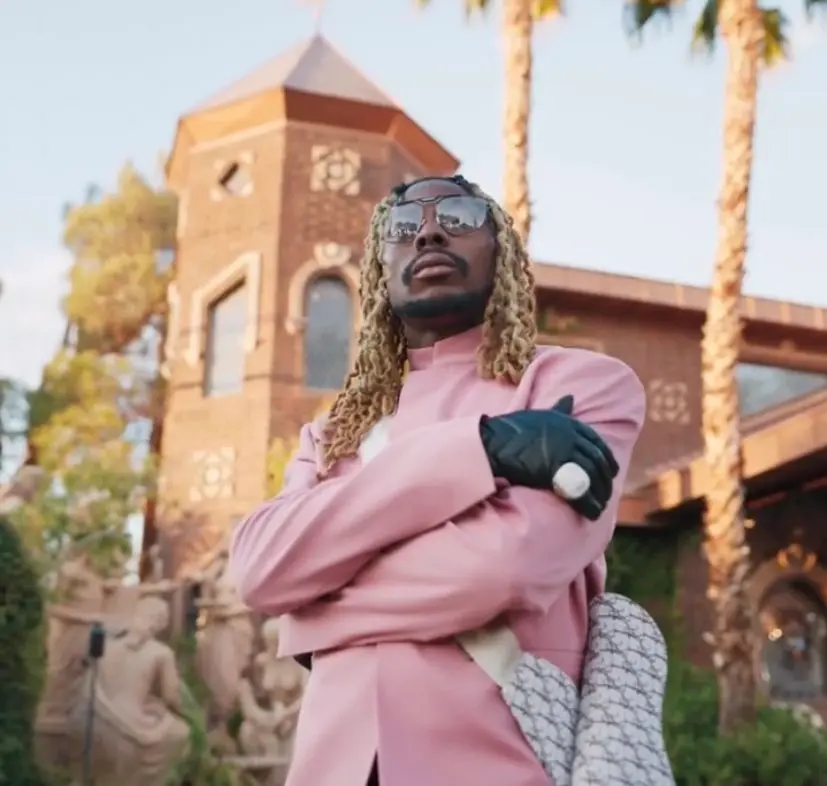

In [2]:
img = Image.open('/Users/netoa/Downloads/Asake_2.webp')
img

100%|########################################| 176M/176M [00:00<00:00, 176GB/s]


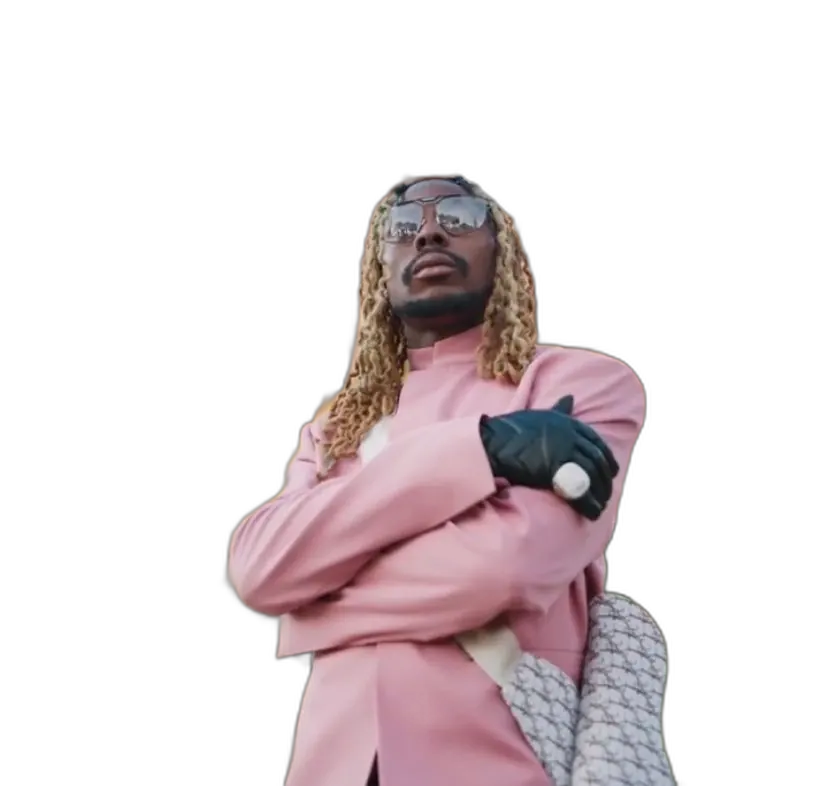

In [3]:
img_bg_removed = rembg.remove(img)
img_bg_removed

In [6]:
img_bg_removed.save('/Users/netoa/Downloads/asake_final.png')

#### Assessing

As usual, I carried out visual and programmatic assessments of my dataset to find any quality or tidiness issues that may interfere with my analysis.

In [35]:
track_df = pd.read_csv('track_list.csv')

In [45]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              50 non-null     object 
 1   album             50 non-null     object 
 2   artist            50 non-null     object 
 3   release_date      50 non-null     object 
 4   duration          50 non-null     float64
 5   popularity        50 non-null     int64  
 6   danceability      50 non-null     float64
 7   energy            50 non-null     float64
 8   key               50 non-null     int64  
 9   loudness          50 non-null     float64
 10  mode              50 non-null     int64  
 11  speechiness       50 non-null     float64
 12  acousticness      50 non-null     float64
 13  instrumentalness  50 non-null     float64
 14  liveness          50 non-null     float64
 15  valence           50 non-null     float64
 16  tempo             50 non-null     float64
 17 

In [46]:
track_df.head()

,name,album,artist,release_date,duration,popularity,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Last Last,"Love, Damini",Burna Boy,2022-07-07,2.87,81,0.795,0.565,3,-4.457,...,0.0802,0.550,87.925,audio_features,5YbPxJwPfrj7uswNwoF1pJ,spotify:track:5YbPxJwPfrj7uswNwoF1pJ,https://api.spotify.com/v1/tracks/5YbPxJwPfrj7...,https://api.spotify.com/v1/audio-analysis/5YbP...,172342,4
1,Peace Be Unto You (PBUY),Mr. Money With The Vibe,Asake,2022-09-07,2.55,65,0.808,0.769,7,-7.207,...,0.1190,0.685,116.001,audio_features,6ewsOjbC1jWAZcjAhVxDs0,spotify:track:6ewsOjbC1jWAZcjAhVxDs0,https://api.spotify.com/v1/tracks/6ewsOjbC1jWA...,https://api.spotify.com/v1/audio-analysis/6ews...,153103,4
2,Bandana,Playboy,Fireboy DML,2022-08-04,2.97,69,0.818,0.605,1,-7.121,...,0.0696,0.366,104.931,audio_features,2qWwuCVeMjF9mUT0S5Iqvl,spotify:track:2qWwuCVeMjF9mUT0S5Iqvl,https://api.spotify.com/v1/tracks/2qWwuCVeMjF9...,https://api.spotify.com/v1/audio-analysis/2qWw...,178225,4
3,Finesse,Finesse,Pheelz,2022-03-03,2.59,74,0.859,0.551,1,-7.916,...,0.1940,0.777,102.049,audio_features,4Gasn91fsCefnN8zM5GjA8,spotify:track:4Gasn91fsCefnN8zM5GjA8,https://api.spotify.com/v1/tracks/4Gasn91fsCef...,https://api.spotify.com/v1/audio-analysis/4Gas...,155293,4
4,Omo Ope (feat. Olamide),Omo Ope,Asake,2022-01-18,2.77,62,0.905,0.747,9,-6.622,...,0.0505,0.866,117.008,audio_features,7d1aTQlsHMgWmkPywDi7h1,spotify:track:7d1aTQlsHMgWmkPywDi7h1,https://api.spotify.com/v1/tracks/7d1aTQlsHMgW...,https://api.spotify.com/v1/audio-analysis/7d1a...,166154,4


After careful assessment, these issues were pointed out:
1. Datatype changes: `release_date` to datetime and `time_signature` to object.
2. Extraneous columns: `type`, `uri`, `track_href`, `analysis_uri`, `duration_ms` to be dropped.

Now time for cleaning.

#### Cleaning.

In [58]:
#creating a copy of the dataset to preserve the initial version
track_cleaned = track_df.copy()

##### Define:
Convert `release_date` to datetime and `time_signature` to object.

##### Code:

In [59]:
track_cleaned = track_cleaned.astype({"release_date":"datetime64[ns]", 'time_signature':'object'})

##### Test:

In [60]:
track_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              50 non-null     object        
 1   album             50 non-null     object        
 2   artist            50 non-null     object        
 3   release_date      50 non-null     datetime64[ns]
 4   duration          50 non-null     float64       
 5   popularity        50 non-null     int64         
 6   danceability      50 non-null     float64       
 7   energy            50 non-null     float64       
 8   key               50 non-null     int64         
 9   loudness          50 non-null     float64       
 10  mode              50 non-null     int64         
 11  speechiness       50 non-null     float64       
 12  acousticness      50 non-null     float64       
 13  instrumentalness  50 non-null     float64       
 14  liveness          50 non-nul

##### Define:
Drop `type`, `uri`, `track_href`, `analysis_uri` and `duration_ms`.

##### Code:

In [61]:
track_cleaned.drop(['type', 'uri', 'track_href', 'analysis_url', 'duration_ms'], axis=1, inplace=True)

##### Test:

In [62]:
track_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              50 non-null     object        
 1   album             50 non-null     object        
 2   artist            50 non-null     object        
 3   release_date      50 non-null     datetime64[ns]
 4   duration          50 non-null     float64       
 5   popularity        50 non-null     int64         
 6   danceability      50 non-null     float64       
 7   energy            50 non-null     float64       
 8   key               50 non-null     int64         
 9   loudness          50 non-null     float64       
 10  mode              50 non-null     int64         
 11  speechiness       50 non-null     float64       
 12  acousticness      50 non-null     float64       
 13  instrumentalness  50 non-null     float64       
 14  liveness          50 non-nul

Now, the dataset is cleaned and ready for EDA and visualization. As usual, I saved the dataset into a csv file, `track_cleaned.csv`.

In [63]:
track_cleaned.to_csv('track_cleaned.csv', index=False)

In [4]:
t_df = pd.read_csv('track_cleaned.csv')
t_df.head()

,name,album,artist,release_date,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,Last Last,"Love, Damini",Burna Boy,2022-07-07,2.87,81,0.795,0.565,3,-4.457,0,0.0948,0.131,0.000000,0.0802,0.550,87.925,5YbPxJwPfrj7uswNwoF1pJ,4
1,Peace Be Unto You (PBUY),Mr. Money With The Vibe,Asake,2022-09-07,2.55,65,0.808,0.769,7,-7.207,0,0.0833,0.101,0.000041,0.1190,0.685,116.001,6ewsOjbC1jWAZcjAhVxDs0,4
2,Bandana,Playboy,Fireboy DML,2022-08-04,2.97,69,0.818,0.605,1,-7.121,1,0.0380,0.293,0.011600,0.0696,0.366,104.931,2qWwuCVeMjF9mUT0S5Iqvl,4
3,Finesse,Finesse,Pheelz,2022-03-03,2.59,74,0.859,0.551,1,-7.916,0,0.1490,0.559,0.000000,0.1940,0.777,102.049,4Gasn91fsCefnN8zM5GjA8,4
4,Omo Ope (feat. Olamide),Omo Ope,Asake,2022-01-18,2.77,62,0.905,0.747,9,-6.622,1,0.0442,0.117,0.000364,0.0505,0.866,117.008,7d1aTQlsHMgWmkPywDi7h1,4


<a id='conclusions'></a>
### Conclusions.

After performing exploratory data analysis on the dataset, the following inferences were made:

- 90% of the songs in the playlist had time signatures of 4.

- 8 of the songs that made the list were released in September 2022, the highest of all the release months.

- Shorter songs were more popular than longer songs.

- Songs with a higher tempo are more danceable that songs with lower tempo.

- Nigerians preferred songs with particularly low acousticness (0 - 0.10) to songs on the other end of the scale.

- Songs with a speechiness of 0.15 (low speechiness) were the most preferred. This means that songs made up primarily of beats and instrumentals were greatly preferred.

- Nigerians enjoyed songs with a midrange energy (0.65), i.e., moderately fast, loud and intense.

- Nigerians greatly enjoyed particularly danceable rhythms, with the most love coming at the 0.8 danceability point.

- Songs with a mid-upper range (0.6-0.75) valence were most preferred. Therefore, Nigerians enjoyed songs with some level of positivity to them.

<a id='references'></a>
### References

1. https://blog.devgenius.io/spotify-data-analysis-with-python-a727542beaa7

2. https://stackoverflow.com/questions/57994570/readtimeout-httpsconnectionpoolhost-port-443-read-timed-out-read-timeo

3. https://www.promptcloud.com/blog/extracting-songs-data-from-your-spotify-playlist-using-python/

4. https://www.datacamp.com/tutorial/joining-dataframes-pandas

5. https://github.com/spotipy-dev/spotipy/tree/master/examples

6. https://twitter.com/akshay_pachaar/status/1584837181343903745?s=20&t=a1SuIK1AqJOuhwl4oqPsrA

7. https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

8. https://bobbyhadz.com/blog/python-error-cannot-uninstall-llvmlite